# General Library Info

Clone pool: CP1610 \
Base Editor: Cas9-ABE \
Gene target: TP53 \
Cell line: A549 \
Reps: A,B (dropped C, counts look like the nutlin arm --> unsure if contaminated/swapped)

# Importing Packages

In [98]:
import pandas as pd
from poola import core as pool
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import gpplot as gpp
from itertools import product

gpp.set_aesthetics()

# Reading in Files

In [99]:
#reading in annotation file
annotation = pd.read_csv("../../required_data/Cas9-NG/2020-10-13_final_TP53_Tiling_Library_NG-BE_annotation_file.csv")

annotation["Gene"]= np.where(annotation["A-G edits"].str.count("Panlethal splice donor")>0, annotation["A-G edits"],annotation["Gene"])

annotation = annotation.rename(columns={'ConstructBarcode': 'sgRNA Target Sequence'})

In [100]:
#reading in metainfo
meta_info = pd.read_csv('../../required_data/Cas9-NG/TP53_tiling_NNNN.txt', delimiter='\t')

#dropping extraneous columns and C>T annotations
meta_info.drop(meta_info[meta_info['Edit Type'] == 'C-T'].index, inplace=True)

#dropping guides that were not included in final library
meta_info = pd.merge(meta_info, annotation, on='sgRNA Target Sequence', how='right')
meta_info

,Input,CRISPR Enzyme,Edit Type,Edit Window,Target Assembly,Target Genome Sequence,Target Gene ID,Target Gene Symbol,Target Gene Strand,Target Transcript ID,...,Nucleotide Edits (global),Guide Edits,Nucleotide Edits,Amino Acid Edits,Mutation Category,Constraint Violations,Note,C-T edits,A-G edits,Gene
0,ENST00000269305.9,SpyoCas9NNNN,A-G,4..8,GRCh38 (9606),NC_000017.11,ENSG00000141510,TP53,-,ENST00000269305.9,...,"7669594A>G, 7669592A>G, 7669591A>G","A_8, A_6, A_5","*15T>C, *17T>C, *18T>C","(NC), (NC), (NC)","UTR, UTR, UTR",NaN,NaN,(NC),"(NC), (NC), (NC)",TP53
1,ENST00000269305.9,SpyoCas9NNNN,A-G,4..8,GRCh38 (9606),NC_000017.11,ENSG00000141510,TP53,-,ENST00000269305.9,...,7669617A>G,A_8,1174T>C,Ser392Pro,Missense,NaN,NaN,Asp393Asn,Ser392Pro,TP53
2,ENST00000269305.9,SpyoCas9NNNN,A-G,4..8,GRCh38 (9606),NC_000017.11,ENSG00000141510,TP53,-,ENST00000269305.9,...,7673808T>C,A_4,812A>G,Glu271Gly,Missense,NaN,NaN,NaN,Glu271Gly,TP53
3,ENST00000269305.9,SpyoCas9NNNN,A-G,4..8,GRCh38 (9606),NC_000017.11,ENSG00000141510,TP53,-,ENST00000269305.9,...,7674873A>G,A_4,658T>C,Tyr220His,Missense,NaN,NaN,Val218Val,Tyr220His,TP53
4,ENST00000269305.9,SpyoCas9NNNN,A-G,4..8,GRCh38 (9606),NC_000017.11,ENSG00000141510,TP53,-,ENST00000269305.9,...,7674889A>G,A_4,642T>C,His214His,Silent,NaN,NaN,Arg213Gln,His214His,TP53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Panlethal splice donor,Panlethal splice donor,Panlethal splice donor
1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Panlethal splice donor,Panlethal splice donor,Panlethal splice donor
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Panlethal splice donor,Panlethal splice donor,Panlethal splice donor
1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Panlethal splice donor,Panlethal splice donor,Panlethal splice donor


In [101]:
#import read counts file from POOLQ
read_counts = pd.read_csv('../../required_data/Cas9-NG/counts-ALG_A549_CP1609_CP1610.txt', delimiter = "\t")

In [102]:
#abbreviating columns 
read_counts.rename(columns = {'A549;CP1610;RDA_429;A;21;Dropout;':"RepA_Dropout",
       'A549;CP1610;RDA_429;B;21;Dropout;':"RepB_Dropout", 'A549;CP1610;RDA_429;C;21;Dropout;':"RepC_Dropout",
       'A549;CP1610;RDA_429;A;21;Nutlin-3;2.5 uM':"RepA_Nutlin", 'A549;CP1610;RDA_429;B;21;Nutlin-3;2.5 uM':"RepB_Nutlin",'A549;CP1610;RDA_429;C;21;Nutlin-3;2.5 uM':"RepC_Nutlin",
      'A549;CP1610;RDA_429;A;21;Etoposide;5 uM':"RepA_Etoposide",
       'A549;CP1610;RDA_429;B;21;Etoposide;5 uM':"RepB_Etoposide",
       'A549;CP1610;RDA_429;C;21;Etoposide;5 uM':"RepC_Etoposide",
                                 'pDNA;CP1610;RDA_429;;;;':'pDNA'
       }, inplace= True)

In [103]:
print(read_counts['RepA_Dropout'].mean())
print(read_counts['RepB_Dropout'].mean())
print(read_counts['RepC_Dropout'].mean())
#drop repC dropout, doesn't align

print(read_counts['RepA_Etoposide'].mean())
print(read_counts['RepB_Etoposide'].mean())
print(read_counts['RepC_Etoposide'].mean())

print(read_counts['RepA_Nutlin'].mean())
print(read_counts['RepB_Nutlin'].mean())
print(read_counts['RepC_Nutlin'].mean())

3628.449773755656
3384.233484162896
10659.070588235294
9592.308597285068
9619.200904977375
10302.715837104073
3367.019004524887
3360.491402714932
3562.2533936651585


In [104]:
#calculating lognorms
lognorms = pool.lognorm_columns(reads_df=read_counts, columns=['pDNA', 'RepA_Dropout', 'RepB_Dropout', 
                                                               'RepA_Nutlin','RepB_Nutlin', 
                                                                'RepA_Etoposide', 'RepB_Etoposide'
                                                               ])
filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['pDNA'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' columns due to low pDNA abundance')

Filtered 5 columns due to low pDNA abundance


In [105]:
#calculating lfc from pDNA
lfc_df_from_pDNA = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_col='pDNA', 
                             target_cols=['RepA_Dropout','RepB_Dropout',
                                         'RepA_Nutlin','RepB_Nutlin',
                                          'RepA_Etoposide', 'RepB_Etoposide'])

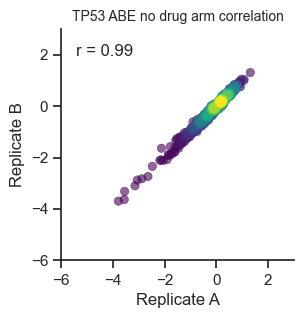

In [106]:
#checking dropout replicate correlations
fig, ax = plt.subplots(figsize=(3,3))
a = gpplot.point_densityplot(data=lfc_df_from_pDNA, x='RepA_Dropout', y='RepB_Dropout')
a = gpplot.add_correlation(data=lfc_df_from_pDNA, x='RepA_Dropout', y='RepB_Dropout')

a.set_ylabel('Replicate B')
a.set_xlabel('Replicate A')
a.set_title('TP53 ABE no drug arm correlation', size=10)

a.set_ylim([-6, 3])
a.set_xlim([-6, 3])
plt.yticks([-6, -4, -2, 0, 2])

sns.despine()

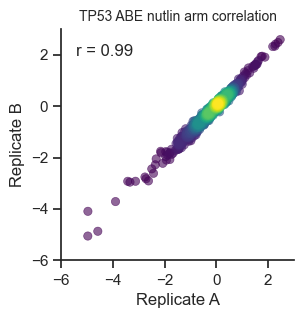

In [107]:
#checking nutlin replicate correlations
fig, ax = plt.subplots(figsize=(3,3))
a = gpplot.point_densityplot(data=lfc_df_from_pDNA, x='RepA_Nutlin', y='RepB_Nutlin')
a = gpplot.add_correlation(data=lfc_df_from_pDNA, x='RepA_Nutlin', y='RepB_Nutlin')
sns.despine()

a.set_ylabel('Replicate B')
a.set_xlabel('Replicate A')
a.set_title('TP53 ABE nutlin arm correlation', size=10)

a.set_ylim([-6, 3])
a.set_xlim([-6, 3])
plt.yticks([-6, -4, -2, 0, 2])

sns.despine()

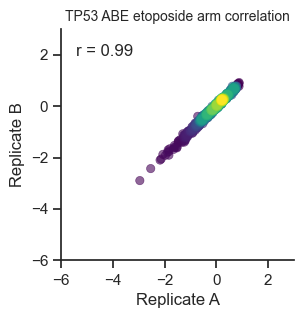

In [108]:
#checking etoposide replicate correlations
fig, ax = plt.subplots(figsize=(3,3))

a = gpplot.point_densityplot(data=lfc_df_from_pDNA, x='RepA_Etoposide', y='RepB_Etoposide')
a = gpplot.add_correlation(data=lfc_df_from_pDNA, x='RepA_Etoposide', y='RepB_Etoposide')
sns.despine()

a.set_ylabel('Replicate B')
a.set_xlabel('Replicate A')
a.set_title('TP53 ABE etoposide arm correlation', size=10)

a.set_ylim([-6, 3])
a.set_xlim([-6, 3])
plt.yticks([-6, -4, -2, 0, 2])

sns.despine()

In [109]:
filtered_lognorms = filtered_lognorms.rename(columns={'Construct Barcode': 'sgRNA Target Sequence'})
lfc_df_from_pDNA = lfc_df_from_pDNA.rename(columns={'Construct Barcode': 'sgRNA Target Sequence'})

In [110]:

#Calculate LFC for drug arms from dropout
lfc_A = pool.calculate_lfcs(lognorm_df=filtered_lognorms[['sgRNA Target Sequence','RepA_Dropout','RepA_Nutlin','RepA_Etoposide']], ref_col='RepA_Dropout', target_cols=['RepA_Nutlin','RepA_Etoposide'])
lfc_B = pool.calculate_lfcs(lognorm_df=filtered_lognorms[['sgRNA Target Sequence','RepB_Dropout','RepB_Nutlin','RepB_Etoposide']], ref_col='RepB_Dropout', target_cols=['RepB_Nutlin','RepB_Etoposide'])
    
#merge replicates into one df
lfc_df_from_dropout = lfc_A.merge(lfc_B,on='sgRNA Target Sequence')
 
#merge everything into one df
lfc = pd.merge(lfc_df_from_dropout, meta_info, on='sgRNA Target Sequence', how='left')
lfc = pd.merge(lfc, lfc_df_from_pDNA, on='sgRNA Target Sequence')

lfc.columns = lfc.columns.str.replace("RepA_Nutlin_x", "RepA_Nutlin_from_dropout")
lfc.columns = lfc.columns.str.replace("RepB_Nutlin_x", "RepB_Nutlin_from_dropout")
lfc.columns = lfc.columns.str.replace("RepA_Etoposide_x", "RepA_Etoposide_from_dropout")
lfc.columns = lfc.columns.str.replace("RepB_Etoposide_x", "RepB_Etoposide_from_dropout")

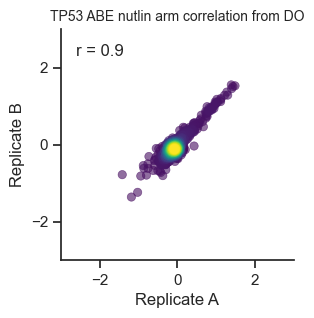

In [111]:
#checking nutlin replicate correlations
fig, ax = plt.subplots(figsize=(3,3))

lfc_filtered = lfc.dropna(subset=['RepA_Nutlin_from_dropout', 'RepB_Nutlin_from_dropout'])
a = gpplot.point_densityplot(data=lfc_filtered, x='RepA_Nutlin_from_dropout', y='RepB_Nutlin_from_dropout')
a = gpplot.add_correlation(data=lfc_filtered, x='RepA_Nutlin_from_dropout', y='RepB_Nutlin_from_dropout')
sns.despine()

a.set_ylabel('Replicate B')
a.set_xlabel('Replicate A')
a.set_title('TP53 ABE nutlin arm correlation from DO', size=10)

a.set_ylim([-3, 3])
a.set_xlim([-3, 3])
plt.yticks([-2, 0, 2])
#plt.xticks([-6, -4, -2, 0, 2])

sns.despine()

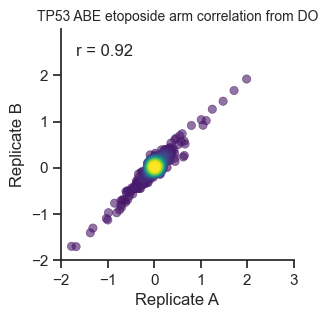

In [112]:
#checking etoposide replicate correlations
fig, ax = plt.subplots(figsize=(3,3))

a = gpplot.point_densityplot(data=lfc_df_from_dropout, x='RepA_Etoposide', y='RepB_Etoposide')
a = gpplot.add_correlation(data=lfc_df_from_dropout, x='RepA_Etoposide', y='RepB_Etoposide')
sns.despine()

a.set_ylabel('Replicate B')
a.set_xlabel('Replicate A')
a.set_title('TP53 ABE etoposide arm correlation from DO', size=10)

a.set_ylim([-2, 3])
a.set_xlim([-2, 3])
plt.yticks([-2, -1, 0, 1, 2])

sns.despine()

# Stem Plots

In [113]:
#code that calculates z-score of a given column of LFCs
def get_z_score(data,col,control_category):
    mean = data.loc[data['Gene'].str.contains(control_category),col].mean()
    std = data.loc[data['Gene'].str.contains(control_category),col].std()
    data[str(col + ';z-score')] = data[col].apply(lambda x: (x-mean)/std)


In [114]:
#calculate z-scores for each replicate

get_z_score(lfc,"RepA_Nutlin_from_dropout",'ONE_NON-GENE_SITE')
get_z_score(lfc,"RepB_Nutlin_from_dropout",'ONE_NON-GENE_SITE')
get_z_score(lfc,"RepA_Etoposide_from_dropout",'ONE_NON-GENE_SITE')
get_z_score(lfc,"RepB_Etoposide_from_dropout",'ONE_NON-GENE_SITE')
get_z_score(lfc,"RepA_Dropout",'ONE_NON-GENE_SITE')
get_z_score(lfc,"RepB_Dropout",'ONE_NON-GENE_SITE')

In [116]:
#Fxn that gets amino acid residues to be plotted 
def GetResidues(string):
    new_string = ''
    if type(string) != float:
        edits = string.split(',')
        #split on comma for libraries designed with BEAGLE, split on semi-colon for libraries designed with Mudra's code
        for edit in edits:
            if edit.startswith('Exon'):
                new_string += 'intron;'
            elif edit == 'utr':
                new_string += 'utr;'
            elif edit == '':
                continue
            else:
                # Strip off all non-digit characters
                for character in edit:
                    if character.isdigit():        
                        new_string += character
                new_string += ';'
    return new_string

def GetMedianResidues(string):
    residues = string.split(';')
    if ('intron' in residues) or ('utr' in residues):
        return np.nan
    residues = [int(res) for res in residues if res != '']
    if len(residues) != 0:
        return np.median(residues)
    else:
        return np.nan

In [117]:
#this code consolidates annotations for TP53-targeting guides and controls
def GetMostSevereMutationType(string1, string2):
    if 'Nonsense' in string1:
        return 'Nonsense'
    elif 'Splice' in string1:
        return 'Splice site'
    elif 'Missense' in string1:
        return 'Missense'
    elif 'Intron' in string1:
        return 'Intron'        
    elif 'Silent' in string1:
        return 'Silent'
    elif 'UTR' in string1:
        return 'UTR'
    elif string1 == 'None':
        if 'NO_SITE' in string2:
            return 'Non-targeting control'
        elif 'ONE_NON-GENE_SITE' in string2:
            return 'Intergenic control'
        elif 'panlethal' in string2:
            return 'Panlethal control'
        else:
            return 'No edits'

In [118]:
lfc.rename(columns= {'Target Gene Sfrom_pDNAmbol':'Target Gene Symbol'}, inplace= True)

In [119]:
lfc['Target Gene ID'] = np.where((lfc['Target Gene ID'] != "ENSG00000141510")
                                 & (lfc['Target Gene ID']!= 'ONE_NON-GENE_SITE'), 
                                 'panlethal control', lfc['Target Gene ID'])

In [120]:
lfc['Mutation Category'] = lfc['Mutation Category'].fillna('None') 

In [121]:
lfc['Mutation Category'].unique() 

array(['UTR, UTR, UTR', 'Missense', 'Silent', 'Silent, Missense', 'None',
       'UTR, UTR, UTR, UTR', 'UTR', 'Intron', 'Intron, Intron',
       'Intron, Intron, Intron', 'Missense, UTR', 'Missense, Missense',
       'Splice-acceptor', 'Missense, Silent', 'UTR, UTR',
       'Intron, Missense', 'Missense, Splice-donor', 'Splice-donor',
       'Silent, Silent', 'Intron, Splice-acceptor', 'Intron, Silent',
       'Silent, Missense, Missense', 'Silent, Silent, Missense',
       'Splice-acceptor, Missense', 'Silent, Splice-donor',
       'Intron, Intron, Intron, Intron', 'Silent, Silent, Silent',
       'Splice-acceptor, Silent'], dtype=object)

In [122]:
#applying GetGeneSymbol code

lfc["Mutation bin"]=lfc.apply(lambda x:GetMostSevereMutationType(x['Mutation Category'], x['Target Gene ID']),axis=1) 

In [123]:
lfc['Residues'] = lfc['A-G edits'].apply(GetResidues)
lfc['Median Residues'] = lfc['Residues'].apply(GetMedianResidues)


In [144]:
lfc['etop_avg_AB'] = lfc[["RepA_Etoposide_from_dropout;z-score","RepB_Etoposide_from_dropout;z-score"]].mean(axis=1)
lfc['nut_avg_AB'] = lfc[["RepA_Nutlin_from_dropout;z-score","RepB_Nutlin_from_dropout;z-score"]].mean(axis=1)
#lfc.to_excel('../../required_data/Cas9-NG/CP1610 ABE z-scores.xlsx')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


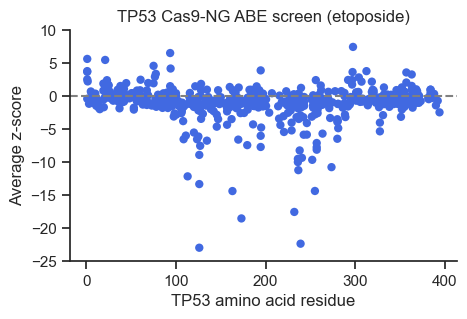

In [125]:
fig, ax = plt.subplots(figsize=(5, 3))
a = sns.scatterplot(data=lfc, x="Median Residues", y="etop_avg_AB", color='royalblue', edgecolors='none')
a.set_ylabel('Average z-score')
a.set_xlabel('TP53 amino acid residue')
a.set_ylim([-25,10])
plt.yticks([-25, -20, -15, -10, -5, 0, 5, 10])
plt.axhline(y=0, color='grey', linestyle='--')
a.set_title('TP53 Cas9-NG ABE screen (etoposide)', size=12)
sns.despine()

In [137]:
'''
lfc['mutation_type'] = np.where(lfc['Mutation bin'] == 'Missense', 'Missense', 
                                   np.where(lfc['Mutation bin'] == 'Silent', 'Silent',
                                            np.where(lfc['Mutation bin'] == 'Nonsense', 'Nonsense', '')))
'''
#laura edit for clarity:
lfc['mutation_type'] = np.where(lfc['Mutation bin'].isin(["Missense","Silent","Nonsense"]),lfc['Mutation bin'],"")

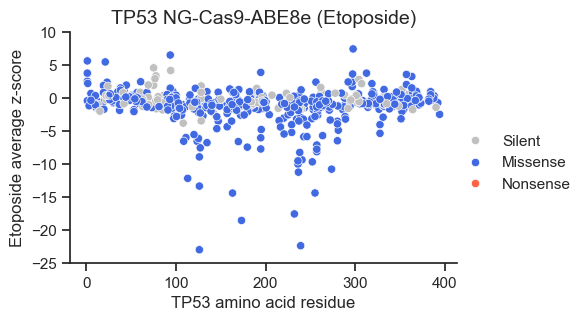

In [138]:
colors = {'Missense':'royalblue', 'Nonsense':'tomato', 'Silent': 'silver'}
fig, ax = plt.subplots(figsize=(5, 3))
a = sns.scatterplot(data=lfc, x="Median Residues", y="etop_avg_AB", hue='mutation_type', palette=colors, hue_order=['Silent', 'Missense','Nonsense'])
a.set_ylabel('Etoposide average z-score')
a.set_xlabel('TP53 amino acid residue')
a.set_ylim([-25,10])
plt.yticks([-25, -20, -15, -10, -5, 0, 5, 10])
a.set_title('TP53 NG-Cas9-ABE8e (Etoposide)', size=14)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(1.15, 0.25), ncol=1, title=None, frameon=False,fontsize=11)

sns.despine()

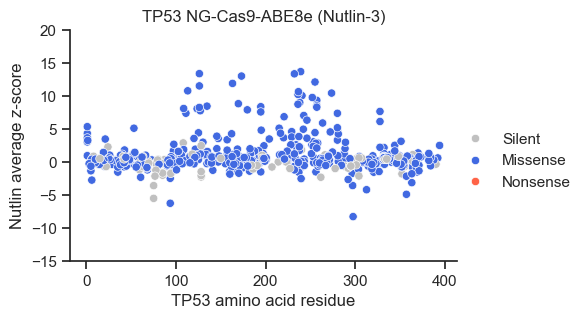

In [139]:
colors = {'Missense':'royalblue', 'Nonsense':'tomato', 'Silent': 'silver'}
fig, ax = plt.subplots(figsize=(5, 3))
a = sns.scatterplot(data=lfc, x="Median Residues", y="nut_avg_AB", hue='mutation_type', palette=colors, hue_order=['Silent', 'Missense','Nonsense'])
a.set_ylabel('Nutlin average z-score')
a.set_xlabel('TP53 amino acid residue')
a.set_ylim([-15,20])
plt.yticks([-15, -10, -5, 0, 5, 10, 15, 20])
a.set_title('TP53 NG-Cas9-ABE8e (Nutlin-3)', size=12)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(1.15, 0.25), ncol=1, title=None, frameon=False,fontsize=11)

sns.despine()

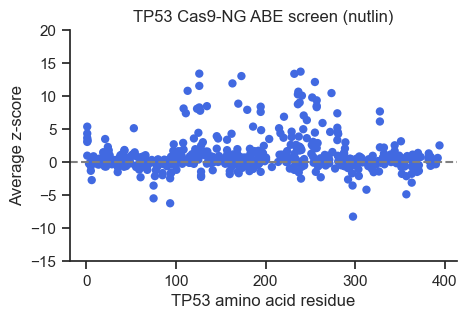

In [140]:
fig, ax = plt.subplots(figsize=(5, 3))
a = sns.scatterplot(data=lfc, x="Median Residues", y="nut_avg_AB", color='royalblue', edgecolors='none')
a.set_ylabel('Average z-score')
a.set_xlabel('TP53 amino acid residue')
a.set_ylim([-15,20])
plt.yticks([-15, -10, -5, 0, 5, 10, 15, 20])
plt.axhline(y=0, color='grey', linestyle='--')
a.set_title('TP53 Cas9-NG ABE screen (nutlin)', size=12)
sns.despine()

### Highlighting guides selected for validation

In [141]:
validated = ['GCTCCTCCATGGCAGTGACC','TCAGACCTATGGAAACTGTG','TCCTCCATGGCAGTGACCCG']

lfc['validated'] = np.where(lfc['sgRNA Target Sequence'].isin(validated),'Validated', 'Not validated')


In [142]:
for guide in validated:
    print(lfc[lfc["sgRNA Target Sequence"]==guide]['sgRNA Target Sequence'])
    print(lfc[lfc["sgRNA Target Sequence"]==guide]['etop_avg_AB'])
    print(lfc[lfc["sgRNA Target Sequence"]==guide]['nut_avg_AB'])

747    GCTCCTCCATGGCAGTGACC
Name: sgRNA Target Sequence, dtype: object
747    1.619663
Name: etop_avg_AB, dtype: float64
747    9.791157
Name: nut_avg_AB, dtype: float64
570    TCAGACCTATGGAAACTGTG
Name: sgRNA Target Sequence, dtype: object
570    5.500697
Name: etop_avg_AB, dtype: float64
570    3.518418
Name: nut_avg_AB, dtype: float64
237    TCCTCCATGGCAGTGACCCG
Name: sgRNA Target Sequence, dtype: object
237    5.656768
Name: etop_avg_AB, dtype: float64
237    5.393231
Name: nut_avg_AB, dtype: float64


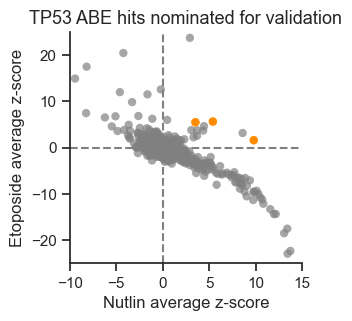

In [143]:
fig, ax = plt.subplots(figsize=(3, 3))
colors = {"Validated":"darkorange", "Not validated":"gray"}
a = sns.scatterplot(data=lfc, x="nut_avg_AB", y="etop_avg_AB", hue='validated', palette=colors, edgecolors='none', alpha=0.7)

plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')

a.set_ylabel('Etoposide average z-score')
a.set_xlabel('Nutlin average z-score')
a.set_title('TP53 ABE hits nominated for validation', size=13)

a.set_ylim(-25, 25)
a.set_xlim(-10, 15)

sns.despine()

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.2, 0.07), ncol=1, title=None, frameon=True)
plt.legend().remove()

df_category_C = lfc[lfc['validated'] == 'Validated']
plt.scatter(df_category_C['nut_avg_AB'], df_category_C['etop_avg_AB'], color='darkorange', edgecolors='none',zorder=3)